In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
print(tf.__version__)

2.8.2


(0.0, 8.0)

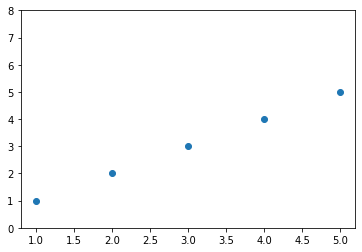

In [22]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

In [23]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [24]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)
b = tf.Variable(1.0)

hypothesis = W * x_data + b

In [25]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
W.numpy(), b.numpy(), cost.numpy()

(2.9, 1.0, 52.110004)

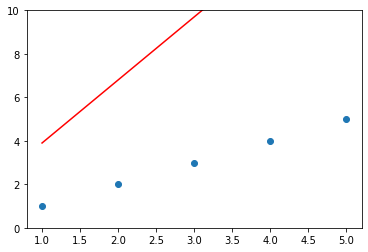

In [26]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 10)
plt.show()

    0|     2.422|     0.866| 52.110004
  100|    0.9134|    0.3125|  0.017898
  200|    0.9383|    0.2227|  0.009092
  300|     0.956|    0.1587|  0.004618
  400|    0.9687|    0.1131|  0.002346
  500|    0.9777|   0.08064|  0.001192
  600|    0.9841|   0.05747|  0.000605
  700|    0.9887|   0.04096|  0.000307
  800|    0.9919|   0.02919|  0.000156
  900|    0.9942|   0.02081|  0.000079
 1000|    0.9959|   0.01483|  0.000040


(0.0, 8.0)

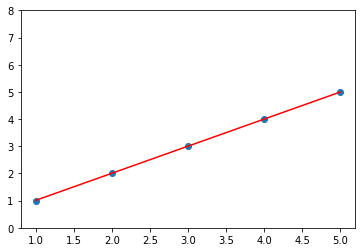

In [32]:
## 경사 하강법(Gradient Descent) 구현 코드 => a = a - learningrate * 미분한 값
W = tf.Variable(2.9)
b = tf.Variable(1.0)
learning_rate = 0.01
for i in range(1001):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
      
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad) # w = w - learning_rate * W_grad
    b.assign_sub(learning_rate * b_grad) # b = b - learning_rate * b_grad
    if i % 100 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

In [33]:
print(W * 5 + b)
print(W * 2.5 +b)

tf.Tensor(4.9942913, shape=(), dtype=float32)
tf.Tensor(2.5045607, shape=(), dtype=float32)


    0|     3.394|     1.876|194.420700
  250|     1.917|      1.17|  0.077172
  500|     1.956|    0.9152|  0.022276
  750|     1.976|    0.7784|  0.006430
 1000|     1.987|     0.705|  0.001856
 1250|     1.993|    0.6655|  0.000536
 1500|     1.996|    0.6443|  0.000155
 1750|     1.998|    0.6329|  0.000045
 2000|     1.999|    0.6268|  0.000013
 2250|     1.999|    0.6235|  0.000004
 2500|       2.0|    0.6217|  0.000001
 2750|       2.0|    0.6208|  0.000000
 3000|       2.0|    0.6203|  0.000000
 3250|       2.0|      0.62|  0.000000
 3500|       2.0|    0.6198|  0.000000
 3750|       2.0|    0.6198|  0.000000
 4000|       2.0|    0.6197|  0.000000
 4250|       2.0|    0.6197|  0.000000
 4500|       2.0|    0.6197|  0.000000
 4750|       2.0|    0.6197|  0.000000
 5000|       2.0|    0.6197|  0.000000
tf.Tensor(10.619673, shape=(), dtype=float32)


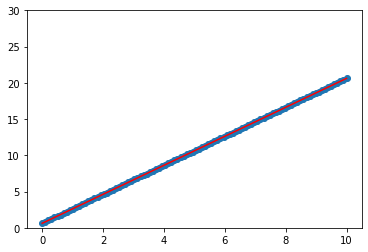

In [47]:
import random

random.seed(2020)
x_data = np.linspace(0, 10, 100)
y_data = 2 * x_data + random.random()

W = tf.Variable(4.2)
b = tf.Variable(2.0)

hypothesis = W * x_data + b
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

learning_rate = 0.005
epochs = 5000

for i in range(epochs + 1):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
      
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad) # w = w - learning_rate * W_grad
    b.assign_sub(learning_rate * b_grad) # b = b - learning_rate * b_grad
    if i % 250 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 30)
#실제로 거의 y = 2x로 예측하려고 함

In [48]:
print(W * 5 + b)

tf.Tensor(10.619673, shape=(), dtype=float32)
